# Introduction to Business Analytics



Participants:

- Elli Georgiou: s223408
- Maria Katarachia: s213633
- Stavroula Douva: s222652
- Michail-Achillefs Katarachias: s222653
- Dimitris Voukatas: s230148



# Table of Content
Section 1: **Introduction + Data Analysis \& Visualizations**<br> <br>
Section 2: **Prediction models**<br> <br>
Section 3: **Exploratory Component** <br> <br>
Section 4: **Conclusions**<br> <br>

# Section 1 : Introduction and Data Analysis and Visualizations

In this first section, we embark on the analysis of our dataframe, aiming to transform it into a higher-quality set that can provide meaningful insights for the subsequent phases of this project. The first crucial step involves preprocessing, which includes cleaning and organizing the dataset.

Cleaning is of paramount importance, encompassing tasks such as handling missing values, removing duplicates, and addressing outliers. These actions ensure that the data is reliable and free from errors, setting the foundation for robust analysis.

Following this approach, we filter the data based on relevant criteria. For instance, we seek data that adheres to logical parameters; for example, age should fall within a specific range, trip duration should follow a consistent format, and station locations must be within the boundaries of New York territory.

Once the data is cleaned and preprocessed, visualization emerges as a powerful tool for gaining initial insights. Visual representations, such as histograms, scatter plots, and correlation matrices, offer a holistic view, unveiling potential patterns, trends, or relationships throughout the dataset.

## Setup

Firstly, we import all the libraries that will be used in this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#import torch
#import torch.nn as nn
#import torch.optim as optim
from time import time

import warnings
warnings.filterwarnings('ignore')
###

## Data importing

We open the file and create a folder for our plots as well.

In [2]:
file_path = 'Trips_2018.csv'


if not os.path.exists('plots'):
    os.makedirs('plots')

with open(file_path, 'r') as f:
    df = pd.read_csv(f)

In [3]:
import tqdm

# Data cleaning

Let's take a look at how our dataframe appears.

In [4]:
df.head()


,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [5]:
# We are checking the data types of our dataframe to see that are on the appropiate type and also the dimensions of our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB


In [6]:
# We are dropping the first column because it is just an index.
df = df.drop(df.columns[0], axis=1)
#df = df.sample(n=1000000, random_state=42)

## Missing values

In [7]:
# We check if there are any null values in our dataframe.
df.isnull().sum()



tripduration                  0
starttime                     0
stoptime                      0
start_station_id           2497
start_station_latitude        0
start_station_longitude       0
end_station_id             2497
end_station_latitude          0
end_station_longitude         0
bikeid                        0
usertype                      0
birth_year                    0
gender                        0
dtype: int64

In [8]:
# # We also check that there are no duplicates.
# df.duplicated().sum()

In [9]:
# We remove null values for start_station_id and end_station_id.
df = df[pd.to_numeric(df['start_station_id'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['end_station_id'], errors='coerce').notnull()]



In [10]:
# One more time we check our dataframe.
df.tail(10)

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
17548329,798,2018-12-31 23:49:37.0590,2019-01-01 00:02:55.1640,518.0,40.747804,-73.973442,3709.0,40.738046,-73.996430,35603,Subscriber,1982,1
17548330,312,2018-12-31 23:49:43.9520,2018-12-31 23:54:56.2510,3166.0,40.780578,-73.985624,3164.0,40.777057,-73.978985,27419,Subscriber,1960,1
17548331,165,2018-12-31 23:50:34.6070,2018-12-31 23:53:20.5830,498.0,40.748549,-73.988084,472.0,40.745712,-73.981948,20190,Subscriber,1994,2
17548332,1027,2018-12-31 23:51:13.9220,2019-01-01 00:08:21.7900,423.0,40.765849,-73.986905,285.0,40.734546,-73.990741,28510,Subscriber,1981,1
17548333,174,2018-12-31 23:53:59.0720,2018-12-31 23:56:53.4750,260.0,40.703652,-74.011678,260.0,40.703652,-74.011678,33887,Subscriber,1980,1
17548334,734,2018-12-31 23:55:06.9910,2019-01-01 00:07:21.2300,336.0,40.730477,-73.999061,379.0,40.749156,-73.991600,27111,Subscriber,1986,1
17548335,2551,2018-12-31 23:55:44.3070,2019-01-01 00:38:15.7820,3320.0,40.794067,-73.962868,2006.0,40.765909,-73.976342,16390,Customer,1969,0
17548336,2376,2018-12-31 23:56:52.8500,2019-01-01 00:36:29.2860,427.0,40.701907,-74.013942,259.0,40.701221,-74.012342,34398,Subscriber,1979,1
17548337,2758,2018-12-31 23:58:29.2120,2019-01-01 00:44:27.5170,3320.0,40.794067,-73.962868,281.0,40.764397,-73.973715,30818,Customer,1969,0
17548338,2459,2018-12-31 23:59:51.0850,2019-01-01 00:40:50.8800,128.0,40.727103,-74.002971,402.0,40.740343,-73.989551,34775,Subscriber,1996,2


## Formating

After finishing the first stage of clearance, we want to have the right format for our time objects before proceeding with more processing afterward.

In [11]:
# Convert start_time and end_time columns to datetime format.
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Extract date, hour, and day of the week from start_time column.
df['date'] = df['starttime'].dt.date
df['hour'] = df['starttime'].dt.hour
df['day_of_week'] = df['starttime'].dt.dayofweek

## Filtering

In [12]:
# Drop any rows with negative trip durations.
df = df[df['tripduration'] > 0]

# Drop any rows with trip durations greater than 24 hours.
df = df[df['tripduration'] <= 86400]

# Drop rows that are outside the 99th percentile of trip durations.
df = df[df['tripduration'] <= df['tripduration'].quantile(.99)]

# Drop rows where the birth_year is outside the lower 99th percentile of birth years.
df = df[df['birth_year'] >= df['birth_year'].quantile(.01)]

# Drop rows where the gender is not 0, 1 or 2.
df = df[df['gender'].isin([0, 1, 2])]


In [13]:
# We observe the statistics of our dataframe.
df.describe()


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,hour,day_of_week
count,1.719797e+07,17197969,17197969,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07
mean,7.763461e+02,2018-07-16 04:40:34.797161728,2018-07-16 04:53:31.648544256,1.587863e+03,4.073727e+01,-7.398261e+01,1.578785e+03,4.073695e+01,-7.398283e+01,2.657340e+04,1.979383e+03,1.152542e+00,1.389216e+01,2.841132e+00
min,6.100000e+01,2018-01-01 00:01:50.650000,2018-01-01 00:05:07.438000,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.406661e+01,1.452900e+04,1.950000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.560000e+02,2018-05-08 19:31:56.023000064,2018-05-08 19:46:38.684000,3.820000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.031300e+04,1.969000e+03,1.000000e+00,1.000000e+01,1.000000e+00
50%,5.990000e+02,2018-07-19 17:13:06.976999936,2018-07-19 17:27:54.185999872,5.050000e+02,4.073818e+01,-7.398565e+01,5.040000e+02,4.073756e+01,-7.398621e+01,2.828300e+04,1.982000e+03,1.000000e+00,1.500000e+01,3.000000e+00
75%,1.040000e+03,2018-09-27 16:54:18.383000064,2018-09-27 17:08:16.212000,3.249000e+03,4.075757e+01,-7.397283e+01,3.249000e+03,4.075715e+01,-7.397344e+01,3.185800e+04,1.989000e+03,1.000000e+00,1.800000e+01,4.000000e+00
max,3.463000e+03,2018-12-31 23:59:51.085000,2019-01-01 00:44:27.517000,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00,2.300000e+01,6.000000e+00
std,5.745141e+02,NaN,NaN,1.439321e+03,3.197921e-02,1.910248e-02,1.438431e+03,3.175651e-02,1.917265e-02,6.219151e+03,1.134457e+01,5.402702e-01,4.864178e+00,1.928603e+00


# Descriptive study

## Clustering

After cleaning the data we are procceding with the second step.
We apply PCA method to gain insights about the correlation of our features.

In [14]:
df['tripduration'] = (df['stoptime'] - df['starttime']).dt.total_seconds()


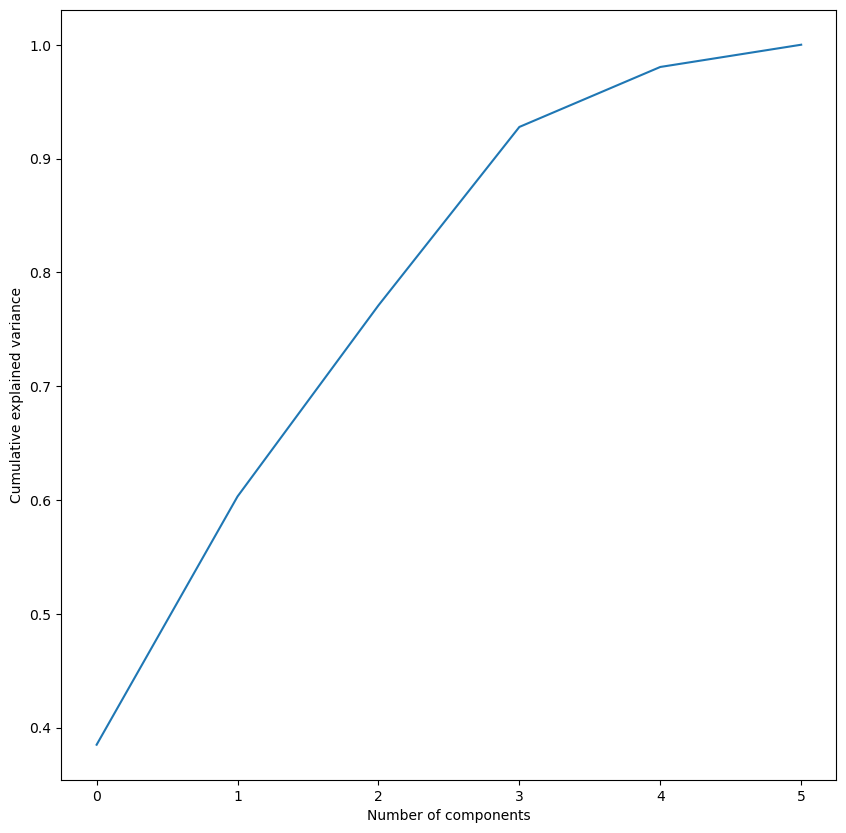


Principal Component 1 Loadings:
end_station_latitude       0.534670
start_station_latitude     0.532694
end_station_longitude      0.463596
start_station_longitude    0.463215
tripduration               0.027839
birth_year                -0.010040
Name: 0, dtype: float64

Principal Component 2 Loadings:
start_station_latitude     0.422474
end_station_latitude       0.416863
tripduration               0.198324
birth_year                -0.349590
start_station_longitude   -0.492781
end_station_longitude     -0.493317
Name: 1, dtype: float64

Principal Component 3 Loadings:
birth_year                 0.463690
end_station_latitude       0.182085
start_station_latitude     0.174547
end_station_longitude     -0.172745
start_station_longitude   -0.179161
tripduration              -0.812053
Name: 2, dtype: float64

Principal Component 4 Loadings:
birth_year                 0.814047
tripduration               0.548038
start_station_latitude     0.090106
end_station_latitude       0.080366
star

In [15]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year', 'tripduration']])
scaled_df = pd.DataFrame(scaled_df, columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year', 'tripduration'])

# PCA using all the features
pca = PCA(n_components=6)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)
pca_df = pd.DataFrame(pca.components_, columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year', 'tripduration'])


plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.savefig(os.path.join('plots', 'pca_cumulative_explained_variance.png'))
plt.show()

corr_matrix = scaled_df.corr()
corr_matrix['tripduration'].sort_values(ascending=False)

# Print the loadings for each principal component
for i in range(len(pca_df)):
    print(f"\nPrincipal Component {i + 1} Loadings:")
    print(pca_df.iloc[i].sort_values(ascending=False))


It seems that the start_station_latitude , end_station_longitude  contain plethora of information for our problem.       

# Elbow method

Further processing with K-means clustering to remove locations we don't care about.

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract coordinates from the sample
coordinates_start = df[['start_station_latitude', 'start_station_longitude']]
coordinates_end = df[['end_station_latitude', 'end_station_longitude']]

#Standardize the coordinates
# scaler = StandardScaler()
# coordinates_standardized = scaler.fit_transform(coordinates_start)

# Plot K-means with 35 clusters
kmeans = KMeans(n_clusters=25, random_state=42)
kmeans.fit(coordinates_start)
df['cluster'] = kmeans.predict(coordinates_start)

# Cluster the data into 20 clusters
kmeans = KMeans(n_clusters=20, init='k-means++', random_state=42).fit(coordinates_start)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.predict(coordinates_start)

KeyboardInterrupt: 

Remove the locations that are more than 3 standard deviations from the center of the clusters.

In [17]:
# Calculate the distance between each point and its cluster center
distance = kmeans.transform(coordinates_start)

# Get the minimum distance for each point and its cluster index
min_distance = np.min(distance, axis=1)
min_distance_cluster = np.argmin(distance, axis=1)

threshold = 2*np.std(distance,axis=1)

# Get the indices of the points that are within the threshold distance of a cluster center
within_threshold = np.argwhere(min_distance < threshold).flatten()

# Remove the points that are outside the threshold distance of a cluster center
df = df.iloc[within_threshold]

# Plot the stations with an underlying map of New York City.
#plot_stations_map(df)
##gb

KeyboardInterrupt: 

Find the most important cluster and get all the relevant values from the dataframe based on it (MVC - Most Valuable Cluster).

In [ ]:
df

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,date,hour,day_of_week,cluster
0,970.752,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,2018-01-01,13,0,12
1,723.159,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,2018-01-01,15,0,12
2,496.835,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,2018-01-01,15,0,12
3,306.819,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,2018-01-01,15,0,12
4,306.074,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,2018-01-01,18,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548334,734.239,2018-12-31 23:55:06.991,2019-01-01 00:07:21.230,336.0,40.730477,-73.999061,379.0,40.749156,-73.991600,27111,Subscriber,1986,1,2018-12-31,23,0,15
17548335,2551.475,2018-12-31 23:55:44.307,2019-01-01 00:38:15.782,3320.0,40.794067,-73.962868,2006.0,40.765909,-73.976342,16390,Customer,1969,0,2018-12-31,23,0,17
17548336,2376.436,2018-12-31 23:56:52.850,2019-01-01 00:36:29.286,427.0,40.701907,-74.013942,259.0,40.701221,-74.012342,34398,Subscriber,1979,1,2018-12-31,23,0,8
17548337,2758.305,2018-12-31 23:58:29.212,2019-01-01 00:44:27.517,3320.0,40.794067,-73.962868,281.0,40.764397,-73.973715,30818,Customer,1969,0,2018-12-31,23,0,17


After identifying clusters based on departure stations, the next step is to determine which cluster exhibits the largest demand in terms of the number of pickups.

In [ ]:
# We work with the cluster with the largest demand.

larg_cluster = df['cluster'].value_counts().index[0]

df_cluster = df[df['cluster'] == larg_cluster]

# We want to create two timeseries that will describe for hourly intervals the pick up and the dropoffs counts for the one cluster with the largest demand.

df_cluster

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,date,hour,day_of_week,cluster
27868,314.553,2018-01-01 03:59:54.496,2018-01-01 04:05:09.049,174.0,40.738177,-73.977387,527.0,40.744023,-73.976056,19680,Subscriber,1988,2,2018-01-01,3,0,14
27869,246.698,2018-01-01 10:17:50.017,2018-01-01 10:21:56.715,174.0,40.738177,-73.977387,491.0,40.740964,-73.986022,28574,Subscriber,1975,1,2018-01-01,10,0,14
27870,1267.617,2018-01-01 11:34:04.432,2018-01-01 11:55:12.049,174.0,40.738177,-73.977387,161.0,40.729170,-73.998102,19692,Subscriber,1980,2,2018-01-01,11,0,14
27871,1263.639,2018-01-01 13:00:32.442,2018-01-01 13:21:36.081,174.0,40.738177,-73.977387,3288.0,40.778301,-73.948813,31282,Subscriber,1995,1,2018-01-01,13,0,14
27872,973.402,2018-01-01 15:56:18.426,2018-01-01 16:12:31.828,174.0,40.738177,-73.977387,311.0,40.717227,-73.988021,31579,Subscriber,1989,2,2018-01-01,15,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548225,664.716,2018-12-31 22:30:34.419,2018-12-31 22:41:39.135,540.0,40.743116,-73.982154,496.0,40.737262,-73.992390,18634,Subscriber,1961,2,2018-12-31,22,0,14
17548255,1693.256,2018-12-31 22:48:11.920,2018-12-31 23:16:25.176,326.0,40.729538,-73.984267,3701.0,40.708318,-74.005041,34772,Subscriber,1996,2,2018-12-31,22,0,14
17548260,456.799,2018-12-31 22:50:57.840,2018-12-31 22:58:34.639,3463.0,40.735367,-73.987974,3660.0,40.741022,-74.001385,34137,Subscriber,1955,2,2018-12-31,22,0,14
17548288,849.923,2018-12-31 23:15:39.911,2018-12-31 23:29:49.834,474.0,40.745168,-73.986831,281.0,40.764397,-73.973715,29995,Subscriber,1961,1,2018-12-31,23,0,14


In [ ]:
# Data preproccesing we keep only theccolumns we need
columns_to_remove = ['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude','end_station_longitude','bikeid','day_of_week','usertype','birth_year','gender']
df_cluster = df_cluster.drop(columns=columns_to_remove, axis=1)


In [ ]:
df_cluster

,tripduration,starttime,stoptime,date,hour,cluster
27868,314.553,2018-01-01 03:59:54.496,2018-01-01 04:05:09.049,2018-01-01,3,14
27869,246.698,2018-01-01 10:17:50.017,2018-01-01 10:21:56.715,2018-01-01,10,14
27870,1267.617,2018-01-01 11:34:04.432,2018-01-01 11:55:12.049,2018-01-01,11,14
27871,1263.639,2018-01-01 13:00:32.442,2018-01-01 13:21:36.081,2018-01-01,13,14
27872,973.402,2018-01-01 15:56:18.426,2018-01-01 16:12:31.828,2018-01-01,15,14
...,...,...,...,...,...,...
17548225,664.716,2018-12-31 22:30:34.419,2018-12-31 22:41:39.135,2018-12-31,22,14
17548255,1693.256,2018-12-31 22:48:11.920,2018-12-31 23:16:25.176,2018-12-31,22,14
17548260,456.799,2018-12-31 22:50:57.840,2018-12-31 22:58:34.639,2018-12-31,22,14
17548288,849.923,2018-12-31 23:15:39.911,2018-12-31 23:29:49.834,2018-12-31,23,14


# Pick up dataframe

In [ ]:
# We order the elements of this dataframe based on the date.

df_cluster.sort_values(by = ['starttime'],inplace = True )
# We work on hourly intervals for pick ups
pickups = df_cluster.copy()
pickups.set_index('starttime', inplace=True)
hourly_pickups = pickups.resample('H').count()  # You can replace 'count' with other aggregation functions like 'sum', 'mean', etc.
columns_to_drop = ['tripduration', 'stoptime', 'date', 'cluster']
hourly_pickups = hourly_pickups.rename(columns={'hour': 'pickup_counts'})
hourly_pickups = hourly_pickups.drop(columns=columns_to_drop)
hourly_pickups

,pickup_counts
starttime,
2018-01-01 00:00:00,16
2018-01-01 01:00:00,21
2018-01-01 02:00:00,10
2018-01-01 03:00:00,8
2018-01-01 04:00:00,2
...,...
2018-12-31 19:00:00,20
2018-12-31 20:00:00,24
2018-12-31 21:00:00,4


# Drop off dataframe


In [ ]:
df_cluster['dropoff_hour'] =df_cluster['stoptime'].dt.hour
df_cluster = df_cluster.rename(columns={'hour': 'pickup_hour'})
dropoff = df_cluster.copy()
dropoff





,tripduration,starttime,stoptime,date,pickup_hour,cluster,dropff_hour
380071,149.830,2018-01-01 00:16:03.474,2018-01-01 00:18:33.304,2018-01-01,0,14,0
326974,501.628,2018-01-01 00:16:45.684,2018-01-01 00:25:07.312,2018-01-01,0,14,0
448924,1311.145,2018-01-01 00:25:01.823,2018-01-01 00:46:52.968,2018-01-01,0,14,0
185906,854.862,2018-01-01 00:27:26.990,2018-01-01 00:41:41.852,2018-01-01,0,14,0
185907,998.095,2018-01-01 00:27:39.305,2018-01-01 00:44:17.400,2018-01-01,0,14,0
...,...,...,...,...,...,...,...
17548225,664.716,2018-12-31 22:30:34.419,2018-12-31 22:41:39.135,2018-12-31,22,14,22
17548255,1693.256,2018-12-31 22:48:11.920,2018-12-31 23:16:25.176,2018-12-31,22,14,23
17548260,456.799,2018-12-31 22:50:57.840,2018-12-31 22:58:34.639,2018-12-31,22,14,22
17548288,849.923,2018-12-31 23:15:39.911,2018-12-31 23:29:49.834,2018-12-31,23,14,23


In [ ]:
columns_to_drop = ['tripduration', 'starttime', 'date', 'cluster','pickup_hour']
dropoff = dropoff.drop(columns=columns_to_drop)
dropoff

,stoptime,dropff_hour
380071,2018-01-01 00:18:33.304,0
326974,2018-01-01 00:25:07.312,0
448924,2018-01-01 00:46:52.968,0
185906,2018-01-01 00:41:41.852,0
185907,2018-01-01 00:44:17.400,0
...,...,...
17548225,2018-12-31 22:41:39.135,22
17548255,2018-12-31 23:16:25.176,23
17548260,2018-12-31 22:58:34.639,22
17548288,2018-12-31 23:29:49.834,23


In [ ]:
dropoff.set_index('stoptime', inplace=True)
hourly_dropoff = dropoff.resample('H').count()
hourly_dropoff = hourly_dropoff.rename(columns={'dropff_hour': 'dropoff_counts'})
hourly_dropoff

,dropoff_counts
stoptime,
2018-01-01 00:00:00,12
2018-01-01 01:00:00,22
2018-01-01 02:00:00,13
2018-01-01 03:00:00,7
2018-01-01 04:00:00,3
...,...
2018-12-31 19:00:00,21
2018-12-31 20:00:00,27
2018-12-31 21:00:00,6


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime

# Assuming hourly_pickups and hourly_dropoffs are your DataFrames

# Create lagged features
def create_lagged_features(df, lag_hours_list):
    for lag_hours in lag_hours_list:
        lag_name = f'lag_{lag_hours}hr'
        df[lag_name] = df.iloc[:, 0].shift(lag_hours)  # Assuming the count is the first column
    return df.dropna()

# Apply lagged features
#lag_hours_list = [1, 24, 168]  # 1 hour, 1 day, 1 week
lag_hours_list = [24]  # only for the day before

hourly_pickups = create_lagged_features(hourly_pickups, lag_hours_list)
hourly_dropoff = create_lagged_features(hourly_dropoff, lag_hours_list)

# Define a function to fit and evaluate the model
def fit_and_evaluate(df, target_col, split_date):
    split_date = pd.to_datetime(split_date)
    train = df[df.index < split_date]
    test = df[df.index >= split_date]

    X_train = train.drop(target_col, axis=1)
    y_train = train[target_col]
    X_test = test.drop(target_col, axis=1)
    y_test = test[target_col]

    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    return r2

# Evaluate models
split_date = '2018-11-01'  # Adjust this date as per your dataset
r2_pickups = fit_and_evaluate(hourly_pickups, 'pickup_counts', split_date)
r2_dropoff = fit_and_evaluate(hourly_dropoff, 'dropoff_counts', split_date)

print(f"R² Score for Pickups: {r2_pickups}")
print(f"R² Score for Dropoffs:{r2_dropoff}")

R² Score for Pickups: 0.523435017412309
R² Score for Dropoffs:0.5257574060381437


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor

# Assuming hourly_pickups and hourly_dropoffs are your DataFrames

# Create lagged features
def create_lagged_features(df, lag_hours_list):
    for lag_hours in lag_hours_list:
        lag_name = f'lag_{lag_hours}hr'
        df[lag_name] = df.iloc[:, 0].shift(lag_hours)  # Assuming the count is the first column
    return df.dropna()

# Apply lagged features
lag_hours_list = [1, 24, 168]  # 1 hour, 1 day, 1 week
hourly_pickups = create_lagged_features(hourly_pickups, lag_hours_list)
hourly_dropoff = create_lagged_features(hourly_dropoff, lag_hours_list)

# Define a function to fit and evaluate the model
def fit_and_evaluate(df, target_col, split_date):
    split_date = pd.to_datetime(split_date)
    train = df[df.index < split_date]
    test = df[df.index >= split_date]

    X_train = train.drop(target_col, axis=1)
    y_train = train[target_col]
    X_test = test.drop(target_col, axis=1)
    y_test = test[target_col]

    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    return r2 

# Evaluate models
split_date = '2018-11-01'  # Adjust this date as per your dataset
r2_pickups = fit_and_evaluate(hourly_pickups, 'pickup_counts', split_date)
r2_dropoff = fit_and_evaluate(hourly_dropoff, 'dropoff_counts', split_date)

print(f"R² Score for Pickups: {r2_pickups}")
print(f"R² Score for Dropoffs: {r2_dropoff}")

R² Score for Pickups: 0.8629832328303211
R² Score for Dropoffs: 0.8652671201761162


In [ ]:
#lets make the index  column 

hourly_pickups.reset_index(inplace=True)

# and make this column in datetime format

hourly_pickups['starttime'] = pd.to_datetime(hourly_pickups['starttime'])


## EXPLORATORY

In [ ]:
# Import data
w = pd.read_csv("NYC2018.csv")
w.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"New York City,USA",2018-01-01T00:00:00,-10.8,-16.6,-15.9,66.03,0.0,0,NaN,0.0,...,1026.4,0.0,16.0,0.0,0.0,0,NaN,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"
1,"New York City,USA",2018-01-01T01:00:00,-11.2,-16.6,-17.3,60.69,0.0,0,NaN,0.0,...,1026.5,0.0,16.0,0.0,0.0,0,NaN,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"
2,"New York City,USA",2018-01-01T02:00:00,-11.7,-16.5,-17.3,63.02,0.0,0,NaN,0.0,...,1026.8,0.0,16.0,0.0,0.0,0,NaN,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"
3,"New York City,USA",2018-01-01T03:00:00,-11.7,-16.5,-17.3,63.17,0.0,0,NaN,0.0,...,1027.2,0.0,16.0,0.0,0.0,0,NaN,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"
4,"New York City,USA",2018-01-01T04:00:00,-11.7,-17.8,-17.4,63.01,0.0,0,NaN,0.0,...,1027.2,0.0,16.0,0.0,0.0,0,NaN,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"


In [ ]:
w.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"New York City,USA",2018-01-01T00:00:00,-10.8,-16.6,-15.9,66.03,0.0,0,NaN,0.0,...,1026.4,0.0,16.0,0.0,0.0,0,NaN,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"
1,"New York City,USA",2018-01-01T01:00:00,-11.2,-16.6,-17.3,60.69,0.0,0,NaN,0.0,...,1026.5,0.0,16.0,0.0,0.0,0,NaN,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"
2,"New York City,USA",2018-01-01T02:00:00,-11.7,-16.5,-17.3,63.02,0.0,0,NaN,0.0,...,1026.8,0.0,16.0,0.0,0.0,0,NaN,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"
3,"New York City,USA",2018-01-01T03:00:00,-11.7,-16.5,-17.3,63.17,0.0,0,NaN,0.0,...,1027.2,0.0,16.0,0.0,0.0,0,NaN,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"
4,"New York City,USA",2018-01-01T04:00:00,-11.7,-17.8,-17.4,63.01,0.0,0,NaN,0.0,...,1027.2,0.0,16.0,0.0,0.0,0,NaN,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"


In [ ]:
w.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8760 non-null   object 
 1   datetime          8760 non-null   object 
 2   temp              8760 non-null   float64
 3   feelslike         8760 non-null   float64
 4   dew               8760 non-null   float64
 5   humidity          8760 non-null   float64
 6   precip            8760 non-null   float64
 7   precipprob        8760 non-null   int64  
 8   preciptype        1403 non-null   object 
 9   snow              8760 non-null   float64
 10  snowdepth         8760 non-null   float64
 11  windgust          2666 non-null   float64
 12  windspeed         8760 non-null   float64
 13  winddir           8760 non-null   float64
 14  sealevelpressure  8760 non-null   float64
 15  cloudcover        8760 non-null   float64
 16  visibility        8760 non-null   float64


In [ ]:
w.isnull().sum()

name                   0
datetime               0
temp                   0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
preciptype          7357
snow                   0
snowdepth              0
windgust            6094
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          8760
conditions             0
icon                   0
stations               0
dtype: int64

In [ ]:
columns_to_remove = ['preciptype', 'windgust', 'severerisk']

w = w.drop(columns=columns_to_remove)

In [ ]:
# Check the column names
print(w.columns)

# Drop the columns
#w = w.drop(columns=["precip","windgust","severerisk"])
w.describe()

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'conditions', 'icon', 'stations'],
      dtype='object')


,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.00000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,13.742477,12.789498,7.363174,67.652386,0.12586,16.015982,0.001968,0.122619,10.663505,185.931370,1018.052694,50.637865,15.190080,145.453881,0.522557,1.436301
std,9.908984,11.638457,10.651824,18.030352,0.68237,36.677514,0.021368,0.571203,6.983544,116.617224,8.062534,45.220790,2.465721,235.221544,0.847791,2.367687
min,-14.400000,-22.100000,-20.700000,14.330000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,989.300000,0.000000,0.300000,0.000000,0.000000,0.000000
25%,5.600000,3.100000,-1.700000,54.557500,0.00000,0.000000,0.000000,0.000000,6.100000,51.000000,1013.000000,0.900000,15.900000,0.000000,0.000000,0.000000
50%,13.300000,13.300000,8.200000,67.110000,0.00000,0.000000,0.000000,0.000000,9.500000,230.000000,1018.200000,47.700000,16.000000,12.000000,0.000000,0.000000
75%,22.600000,22.600000,17.000000,83.330000,0.00000,0.000000,0.000000,0.000000,14.400000,279.250000,1022.900000,100.000000,16.000000,192.000000,0.700000,2.000000
max,35.600000,41.400000,25.000000,99.910000,22.04900,100.000000,0.950000,4.580000,46.400000,360.000000,1044.100000,100.000000,16.000000,1059.000000,3.800000,10.000000


In [ ]:
w.duplicated().sum()


0

In [ ]:
w['datetime'] = pd.to_datetime(w['datetime'])
w.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon,stations
0,"New York City,USA",2018-01-01 00:00:00,-10.8,-16.6,-15.9,66.03,0.0,0,0.0,0.0,...,305.0,1026.4,0.0,16.0,0.0,0.0,0,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"
1,"New York City,USA",2018-01-01 01:00:00,-11.2,-16.6,-17.3,60.69,0.0,0,0.0,0.0,...,304.0,1026.5,0.0,16.0,0.0,0.0,0,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"
2,"New York City,USA",2018-01-01 02:00:00,-11.7,-16.5,-17.3,63.02,0.0,0,0.0,0.0,...,295.0,1026.8,0.0,16.0,0.0,0.0,0,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"
3,"New York City,USA",2018-01-01 03:00:00,-11.7,-16.5,-17.3,63.17,0.0,0,0.0,0.0,...,310.0,1027.2,0.0,16.0,0.0,0.0,0,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"
4,"New York City,USA",2018-01-01 04:00:00,-11.7,-17.8,-17.4,63.01,0.0,0,0.0,0.0,...,308.0,1027.2,0.0,16.0,0.0,0.0,0,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC"


In [ ]:
# Extract date, hour, and day of the week from start_time column.
w['date'] = w['datetime'].dt.date
w['hour'] = w['datetime'].dt.hour
w['day_of_week'] = w['datetime'].dt.dayofweek

In [ ]:
print(hourly_pickups)

                     pickup_counts  lag_24hr  lag_1hr  lag_168hr
starttime                                                       
2018-01-09 00:00:00             11       1.0     29.0        6.0
2018-01-09 01:00:00              2       1.0     11.0        2.0
2018-01-09 02:00:00              2       0.0      2.0        1.0
2018-01-09 03:00:00              2       1.0      2.0        0.0
2018-01-09 04:00:00              1       2.0      2.0        4.0
...                            ...       ...      ...        ...
2018-12-31 19:00:00             20     119.0     31.0       57.0
2018-12-31 20:00:00             24      82.0     20.0       42.0
2018-12-31 21:00:00              4      76.0     24.0       23.0
2018-12-31 22:00:00              8      68.0      4.0       37.0
2018-12-31 23:00:00              2      32.0      8.0       25.0

[8568 rows x 4 columns]


In [ ]:
print(hourly_pickups.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8568 entries, 2018-01-09 00:00:00 to 2018-12-31 23:00:00
Freq: H
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pickup_counts  8568 non-null   int64  
 1   lag_24hr       8568 non-null   float64
 2   lag_1hr        8568 non-null   float64
 3   lag_168hr      8568 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 334.7 KB
None


In [ ]:
import pandas as pd

# Assuming 'starttime' is the datetime column in hourly_pickups
# and 'datetime' is the datetime column in your existing DataFrame 'w'
wh = pd.merge(w, hourly_pickups, left_on='datetime', right_index=True, how='left')

# If the column names are different, you can use the 'left_on' and 'right_on' parameters:
# w = pd.merge(w, hourly_pickups, left_on='datetime', right_on='starttime', how='left')

# Display the updated DataFrame 'w'
print(wh)


                   name            datetime  temp  feelslike   dew  humidity  \
0     New York City,USA 2018-01-01 00:00:00 -10.8      -16.6 -15.9     66.03   
1     New York City,USA 2018-01-01 01:00:00 -11.2      -16.6 -17.3     60.69   
2     New York City,USA 2018-01-01 02:00:00 -11.7      -16.5 -17.3     63.02   
3     New York City,USA 2018-01-01 03:00:00 -11.7      -16.5 -17.3     63.17   
4     New York City,USA 2018-01-01 04:00:00 -11.7      -17.8 -17.4     63.01   
...                 ...                 ...   ...        ...   ...       ...   
8755  New York City,USA 2018-12-31 19:00:00   6.7        4.8   5.6     93.01   
8756  New York City,USA 2018-12-31 20:00:00   6.7        4.1   6.1     96.03   
8757  New York City,USA 2018-12-31 21:00:00   7.2        4.5   6.7     96.40   
8758  New York City,USA 2018-12-31 22:00:00   7.2        4.0   6.7     96.33   
8759  New York City,USA 2018-12-31 23:00:00   7.9        5.6   7.2     95.44   

      precip  precipprob  snow  snowdep

In [ ]:
wh

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,...,conditions,icon,stations,date,hour,day_of_week,pickup_counts,lag_24hr,lag_1hr,lag_168hr
0,"New York City,USA",2018-01-01 00:00:00,-10.8,-16.6,-15.9,66.03,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,0,0,NaN,NaN,NaN,NaN
1,"New York City,USA",2018-01-01 01:00:00,-11.2,-16.6,-17.3,60.69,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,1,0,NaN,NaN,NaN,NaN
2,"New York City,USA",2018-01-01 02:00:00,-11.7,-16.5,-17.3,63.02,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,2,0,NaN,NaN,NaN,NaN
3,"New York City,USA",2018-01-01 03:00:00,-11.7,-16.5,-17.3,63.17,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,3,0,NaN,NaN,NaN,NaN
4,"New York City,USA",2018-01-01 04:00:00,-11.7,-17.8,-17.4,63.01,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,4,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,"New York City,USA",2018-12-31 19:00:00,6.7,4.8,5.6,93.01,2.278,100,0.0,0.0,...,"Rain, Overcast",rain,"72505394728,72055399999,KJRB,KNYC,72503014732",2018-12-31,19,0,20.0,119.0,31.0,57.0
8756,"New York City,USA",2018-12-31 20:00:00,6.7,4.1,6.1,96.03,4.532,100,0.0,0.0,...,"Rain, Overcast",rain,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2018-12-31,20,0,24.0,82.0,20.0,42.0
8757,"New York City,USA",2018-12-31 21:00:00,7.2,4.5,6.7,96.40,3.790,100,0.0,0.0,...,"Rain, Overcast",rain,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2018-12-31,21,0,4.0,76.0,24.0,23.0
8758,"New York City,USA",2018-12-31 22:00:00,7.2,4.0,6.7,96.33,4.413,100,0.0,0.0,...,"Rain, Overcast",rain,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2018-12-31,22,0,8.0,68.0,4.0,37.0


In [ ]:
wh.isnull().sum()

name                  0
datetime              0
temp                  0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
snow                  0
snowdepth             0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
conditions            0
icon                  0
stations              0
date                  0
hour                  0
day_of_week           0
pickup_counts       192
lag_24hr            192
lag_1hr             192
lag_168hr           192
dtype: int64

In [ ]:
wh = wh.fillna(wh.mean())



In [ ]:
wh

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,...,conditions,icon,stations,date,hour,day_of_week,pickup_counts,lag_24hr,lag_1hr,lag_168hr
0,"New York City,USA",2018-01-01 00:00:00,-10.8,-16.6,-15.9,66.03,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,0,0,201.819561,201.829248,201.827381,201.199813
1,"New York City,USA",2018-01-01 01:00:00,-11.2,-16.6,-17.3,60.69,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,1,0,201.819561,201.829248,201.827381,201.199813
2,"New York City,USA",2018-01-01 02:00:00,-11.7,-16.5,-17.3,63.02,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,2,0,201.819561,201.829248,201.827381,201.199813
3,"New York City,USA",2018-01-01 03:00:00,-11.7,-16.5,-17.3,63.17,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,3,0,201.819561,201.829248,201.827381,201.199813
4,"New York City,USA",2018-01-01 04:00:00,-11.7,-17.8,-17.4,63.01,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,4,0,201.819561,201.829248,201.827381,201.199813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,"New York City,USA",2018-12-31 19:00:00,6.7,4.8,5.6,93.01,2.278,100,0.0,0.0,...,"Rain, Overcast",rain,"72505394728,72055399999,KJRB,KNYC,72503014732",2018-12-31,19,0,20.000000,119.000000,31.000000,57.000000
8756,"New York City,USA",2018-12-31 20:00:00,6.7,4.1,6.1,96.03,4.532,100,0.0,0.0,...,"Rain, Overcast",rain,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2018-12-31,20,0,24.000000,82.000000,20.000000,42.000000
8757,"New York City,USA",2018-12-31 21:00:00,7.2,4.5,6.7,96.40,3.790,100,0.0,0.0,...,"Rain, Overcast",rain,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2018-12-31,21,0,4.000000,76.000000,24.000000,23.000000
8758,"New York City,USA",2018-12-31 22:00:00,7.2,4.0,6.7,96.33,4.413,100,0.0,0.0,...,"Rain, Overcast",rain,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2018-12-31,22,0,8.000000,68.000000,4.000000,37.000000


In [ ]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              8760 non-null   object        
 1   datetime          8760 non-null   datetime64[ns]
 2   temp              8760 non-null   float64       
 3   feelslike         8760 non-null   float64       
 4   dew               8760 non-null   float64       
 5   humidity          8760 non-null   float64       
 6   precip            8760 non-null   float64       
 7   precipprob        8760 non-null   int64         
 8   snow              8760 non-null   float64       
 9   snowdepth         8760 non-null   float64       
 10  windspeed         8760 non-null   float64       
 11  winddir           8760 non-null   float64       
 12  sealevelpressure  8760 non-null   float64       
 13  cloudcover        8760 non-null   float64       
 14  visibility        8760 n

In [ ]:
# Descriptive Statistics
pickup_stats = wh['pickup_counts'].describe()
weather_stats = wh[['temp', 'feelslike', 'dew', 'humidity']].describe()

# Correlation Analysis
correlation_matrix = wh[['pickup_counts', 'temp', 'feelslike', 'dew', 'humidity']].corr()

# Display the results
print("Pickup Counts Statistics:")
print(pickup_stats)

print("\nWeather Statistics:")
print(weather_stats)

print("\nCorrelation Matrix:")
print(correlation_matrix)

Pickup Counts Statistics:
count    8760.000000
mean      201.819561
std       180.324986
min         0.000000
25%        41.000000
50%       174.000000
75%       311.000000
max       921.000000
Name: pickup_counts, dtype: float64

Weather Statistics:
              temp    feelslike          dew     humidity
count  8760.000000  8760.000000  8760.000000  8760.000000
mean     13.742477    12.789498     7.363174    67.652386
std       9.908984    11.638457    10.651824    18.030352
min     -14.400000   -22.100000   -20.700000    14.330000
25%       5.600000     3.100000    -1.700000    54.557500
50%      13.300000    13.300000     8.200000    67.110000
75%      22.600000    22.600000    17.000000    83.330000
max      35.600000    41.400000    25.000000    99.910000

Correlation Matrix:
               pickup_counts      temp  feelslike       dew  humidity
pickup_counts       1.000000  0.356890   0.351322  0.202400 -0.270451
temp                0.356890  1.000000   0.994941  0.914619  0.102

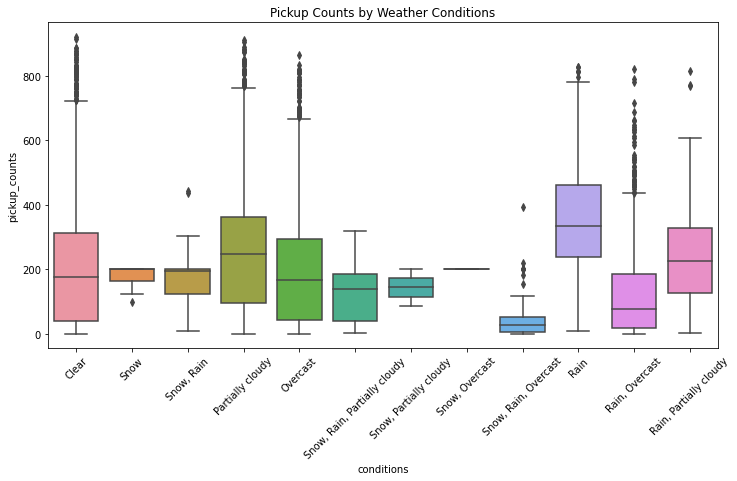

In [ ]:
import seaborn as sns

# Weather Condition Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='conditions', y='pickup_counts', data=wh)
plt.title('Pickup Counts by Weather Conditions')
plt.xticks(rotation=45)
plt.show()

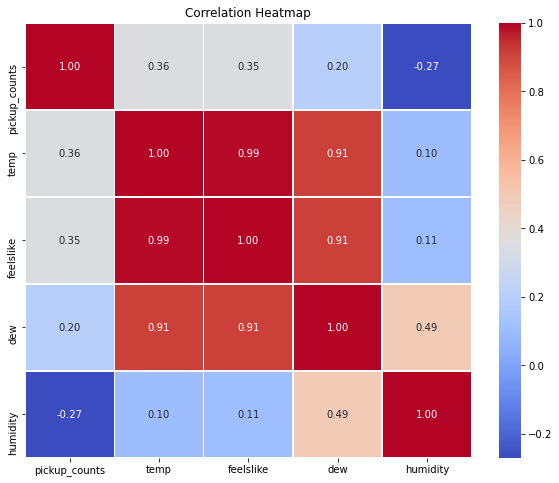

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_data = wh[['pickup_counts', 'temp', 'feelslike', 'dew', 'humidity']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

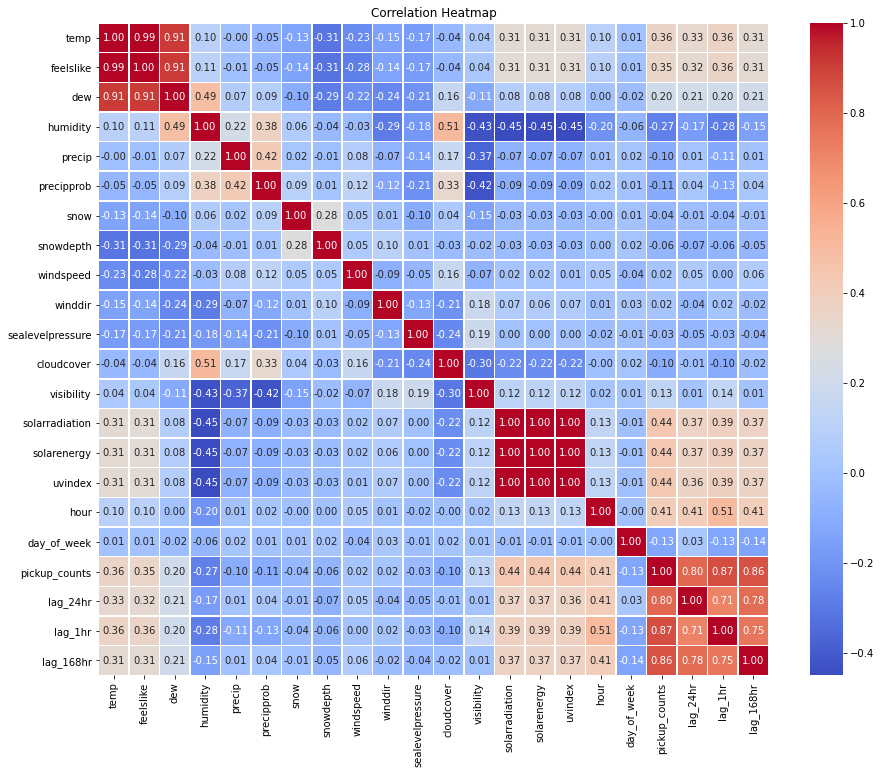

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_data = wh.drop(['datetime'], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

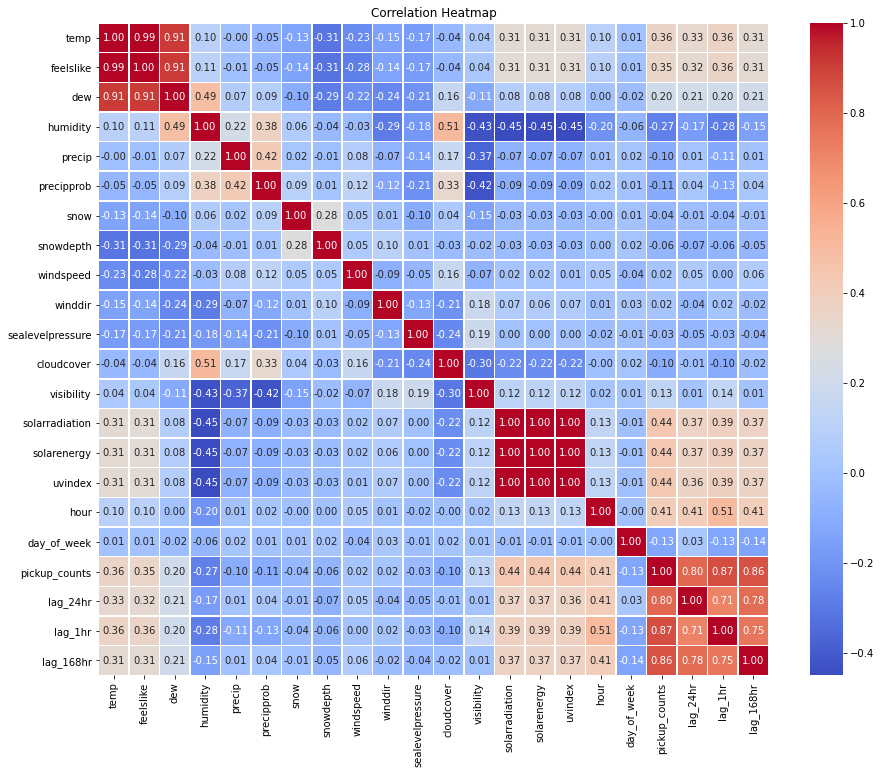

In [ ]:
# Calculate the correlation matrix
correlation_matrix = wh.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
wh

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,...,conditions,icon,stations,date,hour,day_of_week,pickup_counts,lag_24hr,lag_1hr,lag_168hr
0,"New York City,USA",2018-01-01 00:00:00,-10.8,-16.6,-15.9,66.03,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,0,0,201.819561,201.829248,201.827381,201.199813
1,"New York City,USA",2018-01-01 01:00:00,-11.2,-16.6,-17.3,60.69,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,1,0,201.819561,201.829248,201.827381,201.199813
2,"New York City,USA",2018-01-01 02:00:00,-11.7,-16.5,-17.3,63.02,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,2,0,201.819561,201.829248,201.827381,201.199813
3,"New York City,USA",2018-01-01 03:00:00,-11.7,-16.5,-17.3,63.17,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,3,0,201.819561,201.829248,201.827381,201.199813
4,"New York City,USA",2018-01-01 04:00:00,-11.7,-17.8,-17.4,63.01,0.000,0,0.0,0.0,...,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC",2018-01-01,4,0,201.819561,201.829248,201.827381,201.199813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,"New York City,USA",2018-12-31 19:00:00,6.7,4.8,5.6,93.01,2.278,100,0.0,0.0,...,"Rain, Overcast",rain,"72505394728,72055399999,KJRB,KNYC,72503014732",2018-12-31,19,0,20.000000,119.000000,31.000000,57.000000
8756,"New York City,USA",2018-12-31 20:00:00,6.7,4.1,6.1,96.03,4.532,100,0.0,0.0,...,"Rain, Overcast",rain,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2018-12-31,20,0,24.000000,82.000000,20.000000,42.000000
8757,"New York City,USA",2018-12-31 21:00:00,7.2,4.5,6.7,96.40,3.790,100,0.0,0.0,...,"Rain, Overcast",rain,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2018-12-31,21,0,4.000000,76.000000,24.000000,23.000000
8758,"New York City,USA",2018-12-31 22:00:00,7.2,4.0,6.7,96.33,4.413,100,0.0,0.0,...,"Rain, Overcast",rain,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2018-12-31,22,0,8.000000,68.000000,4.000000,37.000000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Print the columns to verify their existence
print("Columns before dropping:", wh.columns)

# Drop unnecessary columns
wh = wh.drop(['name', 'icon', 'stations', 'date'], axis=1, errors='ignore')

# Print the columns after dropping
print("Columns after dropping:", wh.columns)

# Drop rows with NaN values resulting from lag operations
wh = wh.dropna()

# Select specific weather-related features
weather_features = wh[['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'snow', 'snowdepth']]

# Split the data into features (X) and target variable (y)
X = weather_features
y = wh['pickup_counts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = make_pipeline(StandardScaler(), LinearRegression())

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, you can print the coefficients of the model
print('Coefficients:', model.named_steps['linearregression'].coef_)


Columns before dropping: Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'conditions', 'icon', 'stations', 'date',
       'hour', 'day_of_week', 'pickup_counts', 'lag_24hr', 'lag_1hr',
       'lag_168hr'],
      dtype='object')
Columns after dropping: Index(['datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'conditions', 'hour', 'day_of_week',
       'pickup_counts', 'lag_24hr', 'lag_1hr', 'lag_168hr'],
      dtype='object')
Mean Squared Error: 24386.177756050165
Coefficients: [127.08972915 -39.51777832 -16.97007891 -49.93282669  -9.57399102
   8.64066683   0.57968848   8.76764607]


In [ ]:
#Linear Regression model
r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared}')


R-squared: 0.23913582953926826


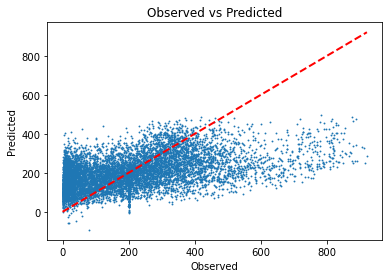

In [ ]:
y_pred_all = model.predict(X)

# Scatter plot
plt.scatter(y, y_pred_all, s=0.75)
plt.ylabel("Predicted")
plt.xlabel("Observed")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle='--', linewidth=2)  
plt.title("Observed vs Predicted")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a pipeline with polynomial features and a linear regression model
degree = 2  
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model on the training data
poly_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_poly = poly_model.predict(X_test)

# Calculate R-squared for the polynomial model
r_squared_poly = poly_model.score(X_test, y_test)
print(f'R-squared (polynomial): {r_squared_poly}')


R-squared (polynomial): 0.24287675120619057


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate R-squared for the Random Forest model
r_squared_rf = rf_model.score(X_test, y_test)
print(f'R-squared (Random Forest): {r_squared_rf}')


R-squared (Random Forest): 0.20022358108993143


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Calculate R-squared for the Gradient Boosting model
r_squared_gb = gb_model.score(X_test, y_test)
print(f'R-squared (Gradient Boosting): {r_squared_gb}')


R-squared (Gradient Boosting): 0.2695591640982449


In [ ]:
# Assuming 'wh' is your DataFrame with a 'datetime' column
wh['hour'] = wh['datetime'].dt.hour
wh['day_of_week'] = wh['datetime'].dt.dayofweek
wh['month'] = wh['datetime'].dt.month

# Drop the original 'datetime' column
wh = wh.drop('datetime', axis=1)


In [ ]:
# Print the columns to verify their existence
print("Columns before dropping:", wh.columns)

# Drop unnecessary columns
wh = wh.drop(['name', 'icon', 'stations', 'date'], axis=1, errors='ignore')

# Print the columns after dropping
print("Columns after dropping:", wh.columns)


Columns before dropping: Index(['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'snow',
       'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'conditions',
       'hour', 'day_of_week', 'pickup_counts', 'lag_24hr', 'lag_1hr',
       'lag_168hr', 'month'],
      dtype='object')
Columns after dropping: Index(['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'snow',
       'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'conditions',
       'hour', 'day_of_week', 'pickup_counts', 'lag_24hr', 'lag_1hr',
       'lag_168hr', 'month'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime


# Create lagged features
def create_lagged_features(df, lag_hours_list):
    for lag_hours in lag_hours_list:
        lag_name = f'lag_{lag_hours}hr'
        df[lag_name] = df['pickup_counts'].shift(lag_hours)  # Assuming 'pickup_counts' is your target variable
    return df.dropna()

# Apply lagged features
lag_hours_list = [24]  # only for the day before
wh = create_lagged_features(wh, lag_hours_list)

# Define a function to fit and evaluate the model
def fit_and_evaluate(df, target_col, split_index):
    split_index = int(split_index)
    train = df[df.index < split_index]
    test = df[df.index >= split_index]

    X_train = train.drop([target_col], axis=1)
    y_train = train[target_col]
    X_test = test.drop([target_col], axis=1)
    y_test = test[target_col]

    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    return r2

# Evaluate the model
split_index = len(wh) * 0.8  
r2_pickups = fit_and_evaluate(wh, 'pickup_counts', split_index)

print(f"R² Score for Pickups: {r2_pickups}")


ValueError: could not convert string to float: 'Clear'